In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from caits.loading import wav_specs_check
from caits.visualization import plot_signal
from utils import load_wav_instance, load_csv_instance
from IPython.display import Audio

In [3]:
audio = load_wav_instance(path="data/yes.wav", return_vector=True)

1


In [4]:
# Load audio file
y = audio["signal"]
sr = audio["sr"]

In [5]:
audio_params = wav_specs_check("data/yes.wav")

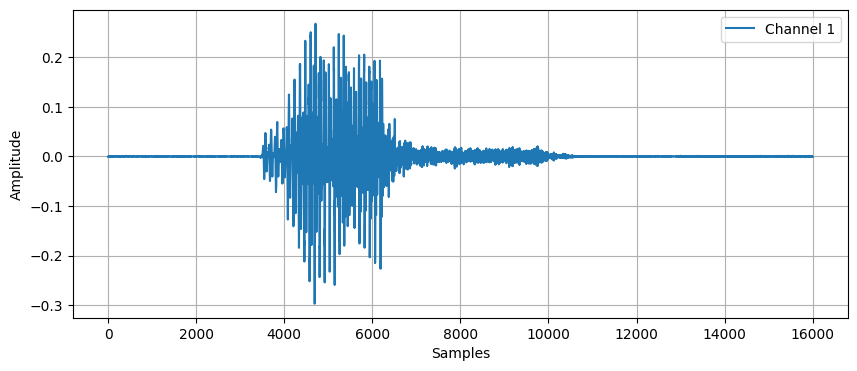

In [6]:
plot_signal(sig=y, sr=sr, return_mode=False)

In [7]:
Audio(y, rate=sr)

# Add noise

In [8]:
from caits.augmentation import add_noise_ts

In [9]:
sig_noise = add_noise_ts(y, scale=0.1)

In [10]:
sig_noise.shape

(16000,)

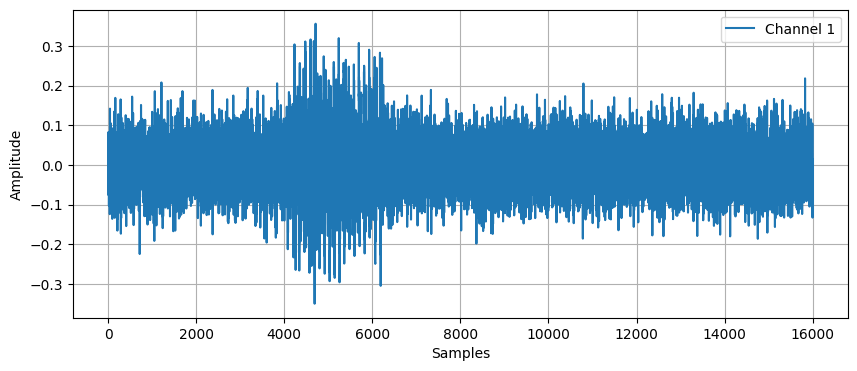

In [11]:
plot_signal(sig=sig_noise, sr=sr, return_mode=False)

In [12]:
Audio(sig_noise, rate=sr)

# Add noise and create multiple instances from the original (3 in this case)

In [13]:
sig_noises = add_noise_ts(y, scale=0.1, repeats=3)

In [14]:
sig_noises.shape

(3, 16000)

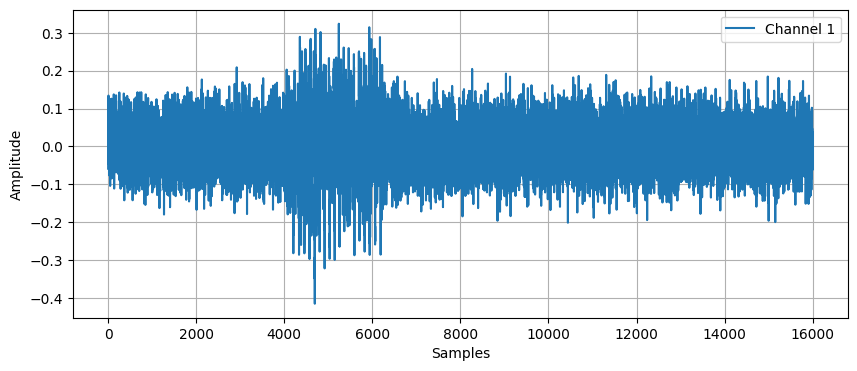

In [15]:
plot_signal(sig=sig_noises[0, :], sr=sr, return_mode=False)

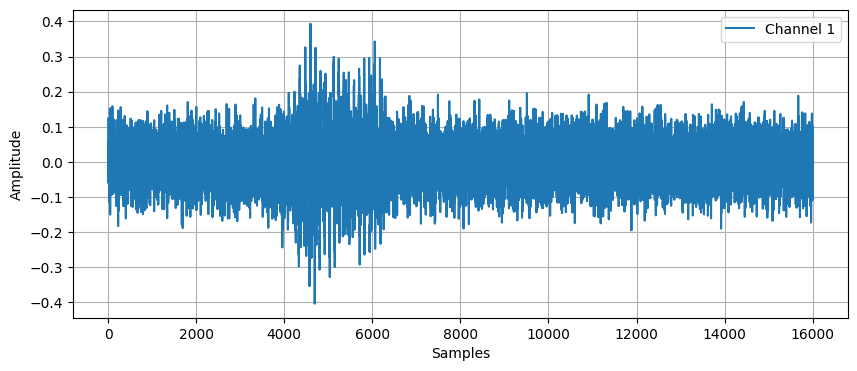

In [16]:
plot_signal(sig=sig_noises[1, :], sr=sr, return_mode=False)

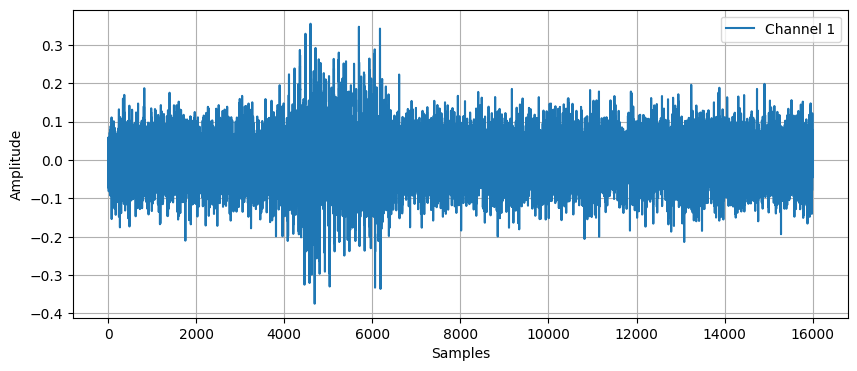

In [17]:
plot_signal(sig=sig_noises[2, :], sr=sr, return_mode=False)

In [18]:
for row in sig_noises:
    print(row.shape)

(16000,)
(16000,)
(16000,)


In [19]:
arr_list = [row for row in sig_noises]

In [20]:
len(arr_list)

3

In [21]:
arr_list[0].shape

(16000,)

# Pitch shift

In [22]:
from caits.augmentation import pitch_shift_ts

In [23]:
sig_pitch = pitch_shift_ts(y, sr=sr, n_steps=10)

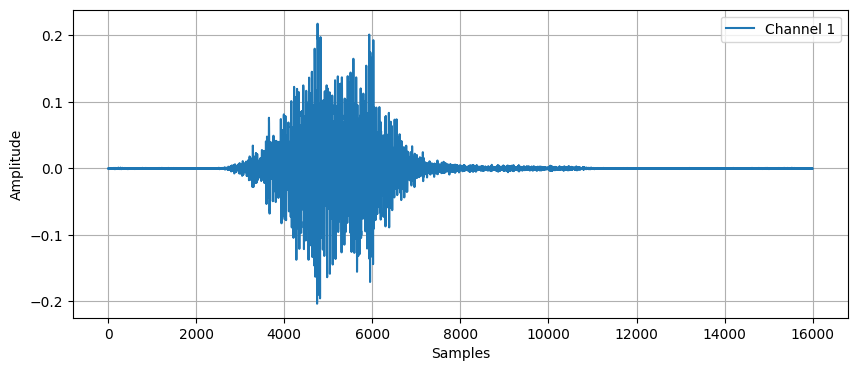

In [24]:
plot_signal(sig=sig_pitch, sr=sr, return_mode=False)

In [25]:
Audio(sig_pitch, rate=sr)

# Time Stretch

In [26]:
from caits.augmentation import time_stretch_ts

In [27]:
sig_stretch = time_stretch_ts(y, rate=2)

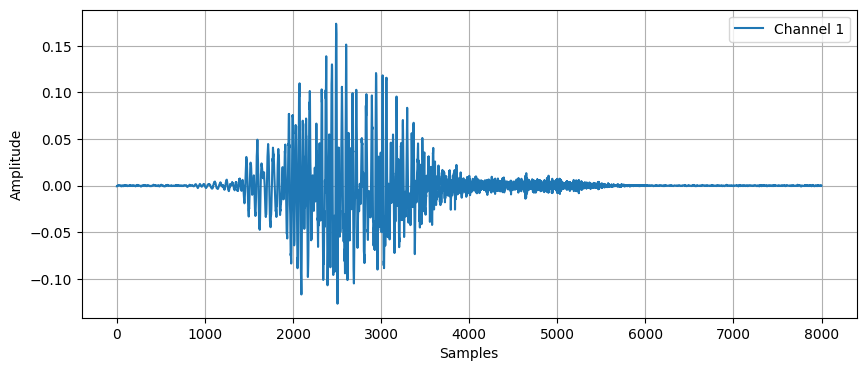

In [28]:
plot_signal(sig=sig_stretch, sr=sr, return_mode=False)

In [29]:
Audio(sig_stretch, rate=sr)